# Install Packages and import libraries

In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=29fb612bad6c9717383411611e44d8e47b464e0c32fb2bddcf492c0e307a4001
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
# for data manipulation
import pandas as pd
import numpy as np
import os
import pickle

# for scoring
#from collections import Counter

# for statistical analysis
import pingouin as pg
from scipy.stats import shapiro, levene, permutation_test
from statsmodels.stats.multitest import multipletests

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the dataset for the the analysis

In [ ]:
with open('data_for_ex.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [ ]:
b['split_3'].keys()

dict_keys(['d_idx', 'm_idx', 'i_idx', 'pred', 'true', 'types'])

In [ ]:
# Load datasets with linguistic features:
df1 = pd.read_csv('/content/Opinion_lingfeat.csv', encoding = "UTF-8")
df2 = pd.read_csv('/content/Memory_lingfeat.csv', encoding = "UTF-8")
df3 = pd.read_csv('/content/Intentions_lingfeat.csv', encoding = "UTF-8")

# Add empty columns

df1['pred'] = np.nan
df1['true'] = np.nan
df1['split'] = np.nan
df1.drop('labels', axis=1, inplace=True)

df2['pred'] = np.nan
df2['true'] = np.nan
df2['split'] = np.nan
df2.drop('memType', axis=1, inplace=True)

df3['pred'] = np.nan
df3['true'] = np.nan
df3['split'] = np.nan
df3.drop('outcome_class', axis=1, inplace=True)

Visualize the modified datasets:

In [ ]:
df1.head()

,ID,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,1,19,3,24,1.263158,2.2,90.46,22.98,1.00,1.00,...,0.00,0.00,3.726250,0.0,0.0,0.0,0.000000,NaN,NaN,NaN
1,1,36,3,66,1.941176,11.2,34.63,41.36,22.12,20.23,...,0.00,-16.66,2.709286,0.0,0.0,0.0,0.000000,NaN,NaN,NaN
2,1,61,3,73,1.303571,7.0,77.87,13.44,37.69,89.90,...,0.00,-9.83,2.550000,0.0,0.0,0.0,0.000000,NaN,NaN,NaN
3,1,34,3,42,1.272727,4.0,85.69,29.85,4.60,66.58,...,0.00,11.76,3.163333,0.0,0.0,0.0,0.000000,NaN,NaN,NaN
4,1,53,3,73,1.431373,7.6,71.14,48.72,18.63,49.04,...,1.89,-5.66,3.071250,0.0,0.0,0.0,1.886792,NaN,NaN,NaN


In [ ]:
df2.head()

,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,tone_pos,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,204,15,271,1.334975,5.0,83.15,29.85,78.94,95.42,6.37,...,2.45,10.29,3.211373,0.009804,0.000000,0.000000,0.000000,NaN,NaN,NaN
1,187,16,219,1.196721,3.0,93.74,59.56,78.46,98.35,7.49,...,7.48,29.40,3.600000,0.016043,0.010695,0.005348,0.000000,NaN,NaN,NaN
2,269,21,337,1.266917,4.7,83.96,45.02,83.20,48.55,2.23,...,3.72,12.65,3.170789,0.022305,0.000000,0.000000,0.011152,NaN,NaN,NaN
3,167,15,207,1.254545,4.0,85.69,1.00,48.87,57.69,3.59,...,0.00,0.61,3.212000,0.011976,0.000000,0.000000,0.017964,NaN,NaN,NaN
4,165,15,195,1.203704,2.8,94.35,36.20,97.64,67.94,3.64,...,3.64,9.09,3.028000,0.024242,0.012121,0.000000,0.012121,NaN,NaN,NaN


In [ ]:
df3.head()

,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,tone_pos,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,101,6,133,1.316832,6.3,79.80,17.84,54.98,98.32,7.92,...,0.00,19.80,3.301081,2.970297,0.000000,0.990099,1.980198,NaN,NaN,NaN
1,20,1,26,1.368421,8.3,69.11,80.96,89.39,20.23,0.00,...,5.00,20.00,3.531667,5.000000,5.000000,0.000000,5.000000,NaN,NaN,NaN
2,41,2,54,1.317073,7.7,76.05,12.54,99.00,89.58,4.88,...,0.00,4.88,3.010833,0.000000,7.317073,4.878049,0.000000,NaN,NaN,NaN
3,36,2,45,1.250000,6.8,78.59,89.52,39.59,93.93,5.56,...,0.00,19.46,4.259167,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
4,63,3,80,1.269841,7.9,75.54,89.52,77.17,70.15,3.17,...,1.59,15.88,3.697368,3.174603,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
for i in b.keys():
  pred = b[i]['pred']
  true = b[i]['true']
  types = b[i]['types']

  df_temp = pd.DataFrame({'pred': pred, 'true': true, 'types': types})

  for t in ['A','B','C']:

    df_temp2 = df_temp[df_temp.types == t]
    if t == 'A':
      idx = b[i]['d_idx']
      df1.loc[df1.ID.isin(idx),'pred'] = df_temp2['pred'].to_numpy()
      df1.loc[df1.ID.isin(idx),'true'] = df_temp2['true'].to_numpy()
      df1.loc[df1.ID.isin(idx),'split'] = i
    elif t == 'B':
      idx = b[i]['m_idx']
      df2.loc[df2.index.isin(idx),'pred'] = df_temp2['pred'].to_numpy()
      df2.loc[df2.index.isin(idx),'true'] = df_temp2['true'].to_numpy()
      df2.loc[df2.index.isin(idx),'split'] = i
    else:
      idx = b[i]['i_idx']
      df3.loc[df3.index.isin(idx),'pred'] = df_temp2['pred'].to_numpy()
      df3.loc[df3.index.isin(idx),'true'] = df_temp2['true'].to_numpy()
      df3.loc[df3.index.isin(idx),'split'] = i


In [ ]:
df1.head()

,ID,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,1,19,3,24,1.263158,2.2,90.46,22.98,1.00,1.00,...,0.00,0.00,3.726250,0.0,0.0,0.0,0.000000,F,F,split_1
1,1,36,3,66,1.941176,11.2,34.63,41.36,22.12,20.23,...,0.00,-16.66,2.709286,0.0,0.0,0.0,0.000000,T,T,split_1
2,1,61,3,73,1.303571,7.0,77.87,13.44,37.69,89.90,...,0.00,-9.83,2.550000,0.0,0.0,0.0,0.000000,T,T,split_1
3,1,34,3,42,1.272727,4.0,85.69,29.85,4.60,66.58,...,0.00,11.76,3.163333,0.0,0.0,0.0,0.000000,F,F,split_1
4,1,53,3,73,1.431373,7.6,71.14,48.72,18.63,49.04,...,1.89,-5.66,3.071250,0.0,0.0,0.0,1.886792,T,T,split_1


In [ ]:
df1.isna().sum()

ID                        0
word_counts               0
num_sentences             0
num_syllables             0
avg_syllables_per_word    0
fk_grade                  0
fk_read                   0
Analytic                  0
Authentic                 0
Tone                      0
tone_pos                  0
tone_neg                  0
focuspast                 0
focuspresent              0
focusfuture               0
Cognition                 0
memory                    0
Self-reference            0
Other-reference           0
Contextual Embedding      0
Perceptual Details        0
Reality Monitoring        0
concr_score               0
Temporal details          0
Spatial details           0
People                    0
Quantity details          0
pred                      0
true                      0
split                     0
dtype: int64

In [ ]:
df2.head()

,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,tone_pos,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,204,15,271,1.334975,5.0,83.15,29.85,78.94,95.42,6.37,...,2.45,10.29,3.211373,0.009804,0.000000,0.000000,0.000000,F,F,split_6
1,187,16,219,1.196721,3.0,93.74,59.56,78.46,98.35,7.49,...,7.48,29.40,3.600000,0.016043,0.010695,0.005348,0.000000,T,T,split_8
2,269,21,337,1.266917,4.7,83.96,45.02,83.20,48.55,2.23,...,3.72,12.65,3.170789,0.022305,0.000000,0.000000,0.011152,F,F,split_9
3,167,15,207,1.254545,4.0,85.69,1.00,48.87,57.69,3.59,...,0.00,0.61,3.212000,0.011976,0.000000,0.000000,0.017964,F,T,split_10
4,165,15,195,1.203704,2.8,94.35,36.20,97.64,67.94,3.64,...,3.64,9.09,3.028000,0.024242,0.012121,0.000000,0.012121,F,F,split_2


In [ ]:
df2.isna().sum()

word_counts               0
num_sentences             0
num_syllables             0
avg_syllables_per_word    0
fk_grade                  0
fk_read                   0
Analytic                  0
Authentic                 0
Tone                      0
tone_pos                  0
tone_neg                  0
focuspast                 0
focuspresent              0
focusfuture               0
Cognition                 0
memory                    0
Self-reference            0
Other-reference           0
Contextual Embedding      0
Perceptual Details        0
Reality Monitoring        0
concr_score               0
Temporal details          0
Spatial details           0
People                    0
Quantity details          0
pred                      6
true                      6
split                     6
dtype: int64

In [ ]:
df2.dropna(inplace = True)
print(df2.shape)
df2.isna().sum()

(5500, 29)


word_counts               0
num_sentences             0
num_syllables             0
avg_syllables_per_word    0
fk_grade                  0
fk_read                   0
Analytic                  0
Authentic                 0
Tone                      0
tone_pos                  0
tone_neg                  0
focuspast                 0
focuspresent              0
focusfuture               0
Cognition                 0
memory                    0
Self-reference            0
Other-reference           0
Contextual Embedding      0
Perceptual Details        0
Reality Monitoring        0
concr_score               0
Temporal details          0
Spatial details           0
People                    0
Quantity details          0
pred                      0
true                      0
split                     0
dtype: int64

In [ ]:
df3.head()

,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,tone_pos,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,101,6,133,1.316832,6.3,79.80,17.84,54.98,98.32,7.92,...,0.00,19.80,3.301081,2.970297,0.000000,0.990099,1.980198,F,T,split_10
1,20,1,26,1.368421,8.3,69.11,80.96,89.39,20.23,0.00,...,5.00,20.00,3.531667,5.000000,5.000000,0.000000,5.000000,T,T,split_7
2,41,2,54,1.317073,7.7,76.05,12.54,99.00,89.58,4.88,...,0.00,4.88,3.010833,0.000000,7.317073,4.878049,0.000000,T,T,split_8
3,36,2,45,1.250000,6.8,78.59,89.52,39.59,93.93,5.56,...,0.00,19.46,4.259167,0.000000,0.000000,0.000000,0.000000,T,T,split_4
4,63,3,80,1.269841,7.9,75.54,89.52,77.17,70.15,3.17,...,1.59,15.88,3.697368,3.174603,0.000000,0.000000,0.000000,F,T,split_4


In [ ]:
df3.isna().sum()

word_counts               0
num_sentences             0
num_syllables             0
avg_syllables_per_word    0
fk_grade                  0
fk_read                   0
Analytic                  0
Authentic                 0
Tone                      0
tone_pos                  0
tone_neg                  0
focuspast                 0
focuspresent              0
focusfuture               0
Cognition                 0
memory                    0
Self-reference            0
Other-reference           0
Contextual Embedding      0
Perceptual Details        0
Reality Monitoring        0
concr_score               0
Temporal details          0
Spatial details           0
People                    0
Quantity details          0
pred                      0
true                      0
split                     0
dtype: int64

# Data Analysis

In [ ]:
# Concatenate the three datasets

scoring_df = pd.concat([df1,df2, df3], axis=0)
scoring_df.head()

,ID,word_counts,num_sentences,num_syllables,avg_syllables_per_word,fk_grade,fk_read,Analytic,Authentic,Tone,...,Perceptual Details,Reality Monitoring,concr_score,Temporal details,Spatial details,People,Quantity details,pred,true,split
0,1.0,19,3,24,1.263158,2.2,90.46,22.98,1.00,1.00,...,0.00,0.00,3.726250,0.0,0.0,0.0,0.000000,F,F,split_1
1,1.0,36,3,66,1.941176,11.2,34.63,41.36,22.12,20.23,...,0.00,-16.66,2.709286,0.0,0.0,0.0,0.000000,T,T,split_1
2,1.0,61,3,73,1.303571,7.0,77.87,13.44,37.69,89.90,...,0.00,-9.83,2.550000,0.0,0.0,0.0,0.000000,T,T,split_1
3,1.0,34,3,42,1.272727,4.0,85.69,29.85,4.60,66.58,...,0.00,11.76,3.163333,0.0,0.0,0.0,0.000000,F,F,split_1
4,1.0,53,3,73,1.431373,7.6,71.14,48.72,18.63,49.04,...,1.89,-5.66,3.071250,0.0,0.0,0.0,1.886792,T,T,split_1


In [ ]:
list(scoring_df.columns)

['ID',
 'word_counts',
 'num_sentences',
 'num_syllables',
 'avg_syllables_per_word',
 'fk_grade',
 'fk_read',
 'Analytic',
 'Authentic',
 'Tone',
 'tone_pos',
 'tone_neg',
 'focuspast',
 'focuspresent',
 'focusfuture',
 'Cognition',
 'memory',
 'Self-reference',
 'Other-reference',
 'Contextual Embedding',
 'Perceptual Details',
 'Reality Monitoring',
 'concr_score',
 'Temporal details',
 'Spatial details',
 'People',
 'Quantity details',
 'pred',
 'true',
 'split']

##ANALYSIS FOR CORRECTED AND MISCLASSIFIED STATEMENTS

In [ ]:
# Compare 'label' and 'predicted_label' columns:
# True values means that 'label' and 'predicted_label' match, and False otherwise.
correct_class = scoring_df['true'] == scoring_df['pred']
print(np.unique(correct_class))

# Filter the DataFrame to keep only the rows where the label and predicted_label match (True in 'correct_class') and do not match (False in 'correct_class').
scoring_df_corrclass = scoring_df[correct_class] # correctly classified instances
scoring_df_misclass = scoring_df[~correct_class] # misclassified instances

###MISCLASSIFIED

In [ ]:
def statistic(x, y, axis):
  return np.mean(x, axis=axis) - np.mean(y, axis=axis)

In [ ]:
splits = scoring_df_corrclass['split'].unique()

for split in splits:

  # Split misclassified  instances in true and false df
  scoring_df_mis_h = scoring_df_misclass[(scoring_df_misclass['true'] == 'T') & (scoring_df_misclass['split'] == split)]
  scoring_df_mis_d = scoring_df_misclass[(scoring_df_misclass['true'] == 'F') & (scoring_df_misclass['split'] == split)]

  scoring_df_misclass_h = scoring_df_mis_h.reset_index().drop(['true','pred','split','ID','index'], axis = 1)
  scoring_df_misclass_d = scoring_df_mis_d.reset_index().drop(['true','pred','split','ID','index'], axis = 1)

  # Computing indipendent permutation tests:

  stats = []
  p_values = []
  cles_scores = []
  columns = scoring_df_misclass_h.columns

  for col in columns:
    # stats and p-value:
    res = permutation_test((scoring_df_misclass_h[col], scoring_df_misclass_d[col]), statistic, permutation_type='independent', vectorized=True, n_resamples=10000,)
    stats.append(res.statistic)
    p_values.append(res.pvalue)
    # effect size:
    cles = pg.compute_effsize(scoring_df_misclass_h[col], scoring_df_misclass_d[col], eftype='CLES')
    cles_scores.append(cles)

  # perform multiple comparisons correction using Bonferroni method
  null_h_rej, corrected_p_values, _, _ = multipletests(p_values, alpha = 0.05, method='holm')

  # save results in a dataframe
  perm_df = pd.DataFrame({"feature": columns, "stat": stats, "p_value": p_values, "corrected_p_value": corrected_p_values, "effect_size":cles_scores, "null_h_rejected": null_h_rej})
  perm_df["significance"] = ['*' if p == True else '-' for p in perm_df['null_h_rejected']]

  # print all comparisons
  perm_df.sort_values(["null_h_rejected","effect_size"], ascending=False, inplace=True)
  print(f"RESULTS FOR {split}")
  print(perm_df)

RESULTS FOR split_1
                   feature       stat   p_value  corrected_p_value  \
5                  fk_read   5.299606  0.000800           0.020798   
19      Perceptual Details   0.412809  0.104790           1.000000   
16          Self-reference   1.180602  0.044196           1.000000   
11               focuspast   0.986401  0.169983           1.000000   
13             focusfuture   0.556925  0.112789           1.000000   
17         Other-reference   0.598568  0.198180           1.000000   
1            num_sentences   1.067557  0.317168           1.000000   
22        Temporal details  -0.318165  0.287771           1.000000   
7                Authentic   5.377211  0.244776           1.000000   
20      Reality Monitoring   1.444919  0.336166           1.000000   
21             concr_score   0.002587  0.949105           1.000000   
24                  People   0.057498  0.642536           1.000000   
10                tone_neg   0.190418  0.547145           1.000000   


###COMPARING FALSE SENTENCES AND TRUE SENTENCES CLASSIFIED AS FALSE (false negative)

LABEL = FALSE

VS.

LABEL = TRUE & PREDICTED LABEL = FALSE

In [ ]:
splits = scoring_df_corrclass['split'].unique()

for split in splits:

  # True negatives are False sentences correctly classified as False
  true_neg = scoring_df[((scoring_df['true'] == 'F') & (scoring_df['pred']=='F')) & (scoring_df['split'] == split)]
  true_negative = true_neg.reset_index().drop(['true','pred','split','ID','index'],axis = 1)

  # False negatives are True sentences wrongly classified as False
  false_neg = scoring_df[((scoring_df['true'] == 'T') & (scoring_df['pred']=='F')) & (scoring_df['split'] == split)]
  false_negative = false_neg .reset_index().drop(['true','pred','split','ID','index'],axis = 1)

  # Computing indipendent permutation tests:

  stats = []
  p_values = []
  cles_scores = []
  columns = true_negative.columns

  for col in columns:
    # stats and p-value:
    res = permutation_test((true_negative[col], false_negative[col]), statistic, permutation_type='independent', vectorized=True, n_resamples=10000,)
    stats.append(res.statistic)
    p_values.append(res.pvalue)
    # effect size:
    cles = pg.compute_effsize(true_negative[col], false_negative[col], eftype='CLES')
    cles_scores.append(cles)

  # perform multiple comparisons correction using Bonferroni method
  null_h_rej, corrected_p_values, _, _ = multipletests(p_values, alpha = 0.05, method='holm')

  # save results in a dataframe
  perm_df = pd.DataFrame({"feature": columns, "stat": stats, "p_value": p_values, "corrected_p_value": corrected_p_values, "effect_size":cles_scores, "null_h_rejected": null_h_rej})
  perm_df["significance"] = ['*' if p == True else '-' for p in perm_df['null_h_rejected']]

  # print all comparisons
  perm_df.sort_values(["null_h_rejected","effect_size"], ascending=False, inplace=True)
  print(f"RESULTS FOR {split}")
  print(perm_df)

RESULTS FOR split_1
                   feature      stat   p_value  corrected_p_value  \
14               Cognition  1.309349  0.050995           1.000000   
12            focuspresent  0.354160  0.281572           1.000000   
3   avg_syllables_per_word  0.018441  0.121988           1.000000   
10                tone_neg  0.424887  0.189781           1.000000   
9                 tone_pos  0.353802  0.240576           1.000000   
23         Spatial details  0.052236  0.686531           1.000000   
25        Quantity details  0.037852  0.608739           1.000000   
8                     Tone  2.197644  0.557344           1.000000   
24                  People -0.002132  0.914909           1.000000   
4                 fk_grade  0.071354  0.824318           1.000000   
2            num_syllables -2.261559  0.862114           1.000000   
1            num_sentences -0.133976  0.884512           1.000000   
0              word_counts -1.850139  0.884512           1.000000   
15            

###COMPARING TRUE SENTENCES AND FALSE SENTENCES CLASSIFIED AS TRUE (false positives)

LABEL = TRUE

VS.

LABEL = FALSE & PREDICTED LABEL = TRUE

In [ ]:
splits = scoring_df_corrclass['split'].unique()

for split in splits:

  # True positives are True sentences correctly classified as True
  true_pos = scoring_df[((scoring_df['true'] == 'T') & (scoring_df['pred']=='T')) & (scoring_df['split'] == split)]
  true_positive = true_neg.reset_index().drop(['true','pred','split','ID','index'],axis = 1)

  # False positives are False sentences wrongly classified as True
  false_pos = scoring_df[((scoring_df['true'] == 'F') & (scoring_df['pred']=='T')) & (scoring_df['split'] == split)]
  false_positive = false_neg .reset_index().drop(['true','pred','split','ID','index'],axis = 1)

  # Computing indipendent permutation tests:

  stats = []
  p_values = []
  cles_scores = []
  columns = true_positive.columns

  for col in columns:
    # stats and p-value:
    res = permutation_test((true_positive[col], false_positive[col]), statistic, permutation_type='independent', vectorized=True, n_resamples=10000,)
    stats.append(res.statistic)
    p_values.append(res.pvalue)
    # effect size:
    cles = pg.compute_effsize(true_positive[col], false_positive[col], eftype='CLES')
    cles_scores.append(cles)

  # perform multiple comparisons correction using Bonferroni method
  null_h_rej, corrected_p_values, _, _ = multipletests(p_values, alpha = 0.05, method='holm')

  # save results in a dataframe
  perm_df = pd.DataFrame({"feature": columns, "stat": stats, "p_value": p_values, "corrected_p_value": corrected_p_values, "effect_size":cles_scores, "null_h_rejected": null_h_rej})
  perm_df["significance"] = ['*' if p == True else '-' for p in perm_df['null_h_rejected']]

  # print all comparisons
  perm_df.sort_values(["null_h_rejected","effect_size"], ascending=False, inplace=True)
  print(f"RESULTS FOR {split}")
  print(perm_df)

RESULTS FOR split_1
                   feature      stat   p_value  corrected_p_value  \
14               Cognition  1.944519  0.004600           0.114989   
10                tone_neg  0.178019  0.577342           1.000000   
11               focuspast  0.450704  0.402960           1.000000   
24                  People  0.175720  0.061594           1.000000   
3   avg_syllables_per_word  0.010688  0.350565           1.000000   
13             focusfuture  0.271852  0.315968           1.000000   
1            num_sentences  0.108642  0.914309           1.000000   
0              word_counts -0.625926  0.947105           1.000000   
2            num_syllables -2.340123  0.861314           1.000000   
15                  memory -0.018049  0.648535           1.000000   
25        Quantity details  0.048982  0.512349           1.000000   
5                  fk_read -0.455722  0.705129           1.000000   
4                 fk_grade -0.061667  0.809119           1.000000   
17         Oth

###CORRECTLY CLASSIFIED

In [97]:
splits = scoring_df_corrclass['split'].unique()
perm_df_sign = pd.DataFrame({'features': columns})
perm_df_pval = pd.DataFrame({'features': columns})
perm_df_cles = pd.DataFrame({'features': columns})
perm_df_stat = pd.DataFrame({'features': columns})

for split in splits:

  # Split correctly classified instances in true and false df
  scoring_df_corr_h = scoring_df_corrclass[(scoring_df_corrclass['true'] == 'T') & (scoring_df_corrclass['split'] == split)]
  scoring_df_corr_d = scoring_df_corrclass[(scoring_df_corrclass['true'] == 'F') & (scoring_df_corrclass['split'] == split)]

  scoring_df_corrclass_h = scoring_df_corr_h.reset_index().drop(['true','pred','split', 'ID'], axis = 1)
  scoring_df_corrclass_d = scoring_df_corr_d.reset_index().drop(['true','pred','split', 'ID'], axis = 1)

  # Computing indipendent permutation tests:
  stats = []
  p_values = []
  cles_scores = []
  columns = scoring_df_corrclass_h.iloc[:,1:].columns

  for col in columns:
    # stats and p-value:
    res = permutation_test((scoring_df_corrclass_h[col], scoring_df_corrclass_d[col]), statistic, permutation_type='independent', vectorized=True, n_resamples=10000,)
    stats.append(res.statistic)
    p_values.append(res.pvalue)
    # effect size:
    cles = pg.compute_effsize(scoring_df_corrclass_h[col], scoring_df_corrclass_d[col], eftype='CLES')
    cles_scores.append(cles)

  # perform multiple comparisons correction using Bonferroni method
  null_h_rej, corrected_p_values, _, _ = multipletests(p_values, alpha = 0.05, method='holm')

  # save results in a dataframe
  perm_df = pd.DataFrame({"feature": columns, "stat": stats, "p_value": p_values, "corrected_p_value": corrected_p_values, "effect_size":cles_scores, "null_h_rejected": null_h_rej})
  perm_df["significance"] = ['*' if p == True else '-' for p in perm_df['null_h_rejected']]

  # print all comparisons
  perm_df.sort_values(["null_h_rejected","effect_size"], ascending=False, inplace=True)
  print(f"RESULTS FOR {split}")
  print(perm_df)

  # Select only significant features
  perm_df_sign[split] = perm_df.loc[:,'significance']
  perm_df_pval[split] = perm_df.loc[:,'corrected_p_value']
  perm_df_cles[split] = perm_df.loc[:,'effect_size']
  perm_df_stat[split] = perm_df.loc[:,'stat']


RESULTS FOR split_1
                   feature       stat   p_value  corrected_p_value  \
4                 fk_grade   0.939236  0.000200           0.005199   
2            num_syllables  37.712679  0.001200           0.027597   
0              word_counts  26.615973  0.001400           0.030797   
13             focusfuture  -0.516197  0.000400           0.009599   
5                  fk_read  -3.772890  0.000200           0.005199   
25        Quantity details   0.018530  0.696530           1.000000   
3   avg_syllables_per_word   0.020942  0.016198           0.340166   
7                Authentic   4.453807  0.069793           1.000000   
15                  memory   0.040718  0.073793           1.000000   
6                 Analytic   1.612340  0.368363           1.000000   
1            num_sentences   0.215196  0.680332           1.000000   
20      Reality Monitoring   0.519091  0.508749           1.000000   
18    Contextual Embedding   0.483880  0.242376           1.000000   


In [98]:
perm_df_sign['Counts'] = perm_df_sign.apply(lambda row: row.str.count('\*').sum(), axis=1)
perm_df_sign.sort_values('Counts', ascending=False, inplace=True)
perm_df_sign

,features,split_1,split_9,split_4,split_8,split_5,split_7,split_2,split_3,split_10,split_6,Counts
4,fk_grade,*,*,*,*,*,*,*,*,*,*,10
5,fk_read,*,*,*,*,*,*,*,*,*,*,10
2,num_syllables,*,*,*,*,-,*,*,*,-,*,8
0,word_counts,*,*,*,-,-,-,*,*,-,*,6
3,avg_syllables_per_word,-,*,*,-,*,-,-,*,*,*,6
6,Analytic,-,*,-,*,*,*,-,-,*,*,6
10,tone_neg,-,-,-,-,-,*,*,-,-,-,2
24,People,-,-,-,-,-,-,*,-,-,-,1
18,Contextual Embedding,-,-,-,-,-,*,-,-,-,-,1
17,Other-reference,-,-,-,-,*,-,-,-,-,-,1


In [99]:
perm_df_cles = perm_df_cles.reindex(perm_df_sign.index)

In [100]:
perm_df_stat = perm_df_stat.reindex(perm_df_sign.index)

In [101]:
perm_df_selected_cles = perm_df_cles.where(perm_df_sign == '*', np.nan)
perm_df_selected_cles['mean'] = perm_df_selected_cles.mean(axis = 1)
perm_df_selected_cles['st_dev'] = perm_df_selected_cles.std(axis = 1)
perm_df_selected_cles['features'] = perm_df_cles['features']
perm_df_selected_cles.reset_index()

,index,features,split_1,split_9,split_4,split_8,split_5,split_7,split_2,split_3,split_10,split_6,mean,st_dev
0,4,fk_grade,0.617513,0.624949,0.665389,0.642946,0.634275,0.643412,0.633716,0.610302,0.643047,0.629831,0.634538,0.014716
1,5,fk_read,0.404096,0.392071,0.353501,0.395006,0.378796,0.385587,0.381718,0.400555,0.378846,0.388983,0.385916,0.013579
2,2,num_syllables,0.572804,0.589809,0.584691,0.566887,NaN,0.558863,0.583205,0.573886,NaN,0.609880,0.580003,0.014702
3,0,word_counts,0.565546,0.580581,0.571540,NaN,NaN,NaN,0.576104,0.565571,NaN,0.600067,0.576568,0.011806
4,3,avg_syllables_per_word,NaN,0.572122,0.602093,NaN,0.578782,NaN,NaN,0.575741,0.583386,0.572755,0.580813,0.010245
5,6,Analytic,NaN,0.576303,NaN,0.565356,0.570042,0.573324,NaN,NaN,0.570280,0.566108,0.570236,0.003813
6,10,tone_neg,NaN,NaN,NaN,NaN,NaN,0.453331,0.458745,NaN,NaN,NaN,0.456038,0.002707
7,24,People,NaN,NaN,NaN,NaN,NaN,NaN,0.437404,NaN,NaN,NaN,0.437404,0.000000
8,18,Contextual Embedding,NaN,NaN,NaN,NaN,NaN,0.568517,NaN,NaN,NaN,NaN,0.568517,0.000000
9,17,Other-reference,NaN,NaN,NaN,NaN,0.429382,NaN,NaN,NaN,NaN,NaN,0.429382,0.000000


In [102]:
perm_df_selected_stat = perm_df_stat.where(perm_df_sign == '*', np.nan)
perm_df_selected_stat['features'] = perm_df_stat['features']
perm_df_selected_stat.reset_index()

,index,features,split_1,split_9,split_4,split_8,split_5,split_7,split_2,split_3,split_10,split_6
0,4,fk_grade,0.939236,0.958636,1.176969,1.214776,1.070758,1.165545,0.997760,0.850260,1.196076,1.063082
1,5,fk_read,-3.772890,-3.955189,-5.209954,-4.195791,-4.774025,-4.073640,-3.866578,-3.844212,-4.833800,-4.453980
2,2,num_syllables,37.712679,50.057289,45.550514,35.472339,NaN,37.440914,44.207852,40.015843,NaN,58.116917
3,0,word_counts,26.615973,35.085459,30.230334,NaN,NaN,NaN,31.829252,28.152056,NaN,42.052659
4,3,avg_syllables_per_word,NaN,0.027220,0.038292,NaN,0.034567,NaN,NaN,0.031057,0.032443,0.030033
5,6,Analytic,NaN,6.583397,NaN,5.979825,6.283274,6.820393,NaN,NaN,6.344249,5.896802
6,10,tone_neg,NaN,NaN,NaN,NaN,NaN,-0.726566,-0.670038,NaN,NaN,NaN
7,24,People,NaN,NaN,NaN,NaN,NaN,NaN,-0.142946,NaN,NaN,NaN
8,18,Contextual Embedding,NaN,NaN,NaN,NaN,NaN,1.367517,NaN,NaN,NaN,NaN
9,17,Other-reference,NaN,NaN,NaN,NaN,-0.897303,NaN,NaN,NaN,NaN,NaN


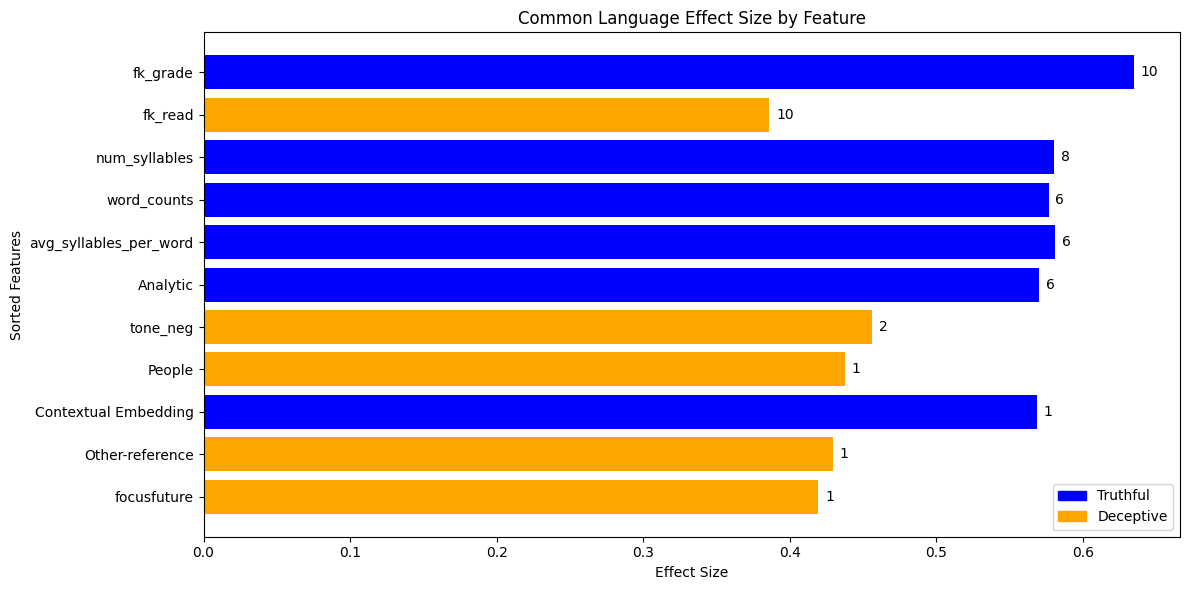

In [103]:
# Create a horizontal bar chart of effect size with an increased figure size
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size (width, height) as needed

# Define colors based on the stat value
colors = ['blue' if stat > 0 else 'orange' for stat in perm_df_selected_stat.iloc[:,1:].mean(axis = 1)]

# Plot the bars
bars = ax.barh(perm_df_selected_cles['features'], perm_df_selected_cles['mean'], color=colors)

# Add legend
t_patch = plt.Rectangle((0, 0), 0, 0, color='blue', label='Truthful')
f_patch = plt.Rectangle((0, 0), 0, 0, color='orange', label='Deceptive')
plt.legend(handles=[t_patch, f_patch], loc = 'lower right')

# Set labels
ax.set_xlabel('Effect Size')
ax.set_ylabel('Sorted Features')
ax.set_title('Common Language Effect Size by Feature')
ax.invert_yaxis()

# Add numerical values to the bars
perm_df_sign.reset_index(inplace = True)

for i, bar in enumerate(bars):
    count = perm_df_sign['Counts'][i]  # Get the count value for the current bar
    ax.annotate(str(count), xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

# Show the plot and adjust spacing
plt.tight_layout()
plt.show()
